In [9]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
location ='drive/MyDrive/Datasets/diabetes.csv'

Mounted at /content/drive


In [ ]:
df = pd.read_csv(location)

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function(a function which scores likelihood of diabetes based on family history)
- Age: Age (years)
- Outcome: Class variable (0 or 1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


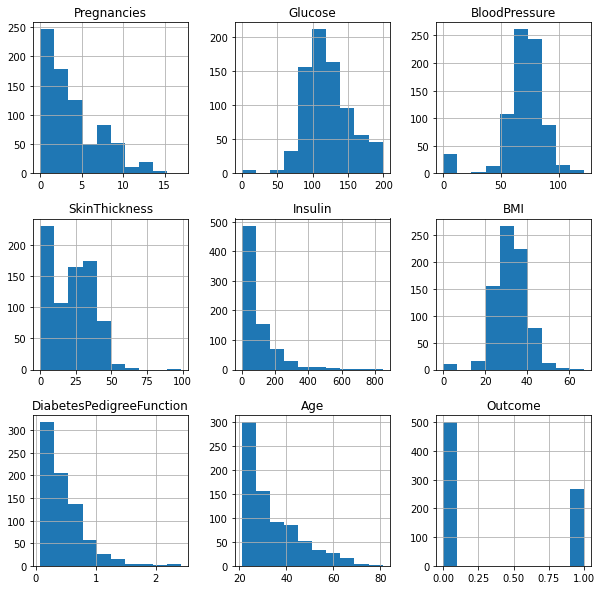

In [13]:
_ = df.hist(figsize=(10, 10))

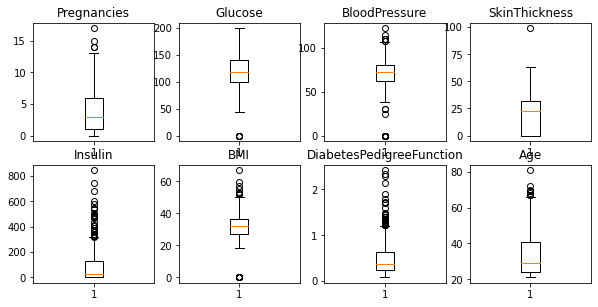

In [14]:
import matplotlib.pyplot as plt

features = df.columns.delete(-1)
plt.figure(figsize=(10, 10))
for i, col in enumerate(features, 1):
    plt.subplot(4, 4, i)
    plt.boxplot(df[col])
    plt.title(col)

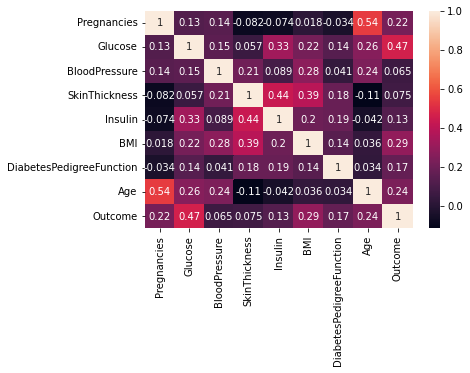

In [15]:
import seaborn as sns


corr_mx = df.corr()
sns.heatmap(corr_mx, annot=True)

Part - 2

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

scores = dict()

### Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,roc_auc_score


rf_clf = RandomForestClassifier(random_state=10)
rf_clf.fit(X_tr_scaled, y_train)

X_tst_scaled = scaler.transform(X_test)
rf_clf.score(X_tst_scaled, y_test)

0.8181818181818182

In [19]:
rf_pred = rf_clf.predict(X_tst_scaled)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.86        97
           1       0.82      0.65      0.73        57

    accuracy                           0.82       154
   macro avg       0.82      0.78      0.79       154
weighted avg       0.82      0.82      0.81       154



In [20]:
from sklearn.metrics import accuracy_score

scores['Random Forest'] = accuracy_score(y_test, rf_pred)

In [21]:
roc_auc_score(y_test, rf_pred)

0.78332429010671

### AdaBoost classifier

In [22]:
from sklearn.ensemble import AdaBoostClassifier


ada_clf = AdaBoostClassifier(random_state=10)
ada_clf.fit(X_tr_scaled, y_train)

ada_clf.score(X_tst_scaled, y_test)

0.7532467532467533

In [23]:
ada_pred = ada_clf.predict(X_tst_scaled)
print(classification_report(y_test, ada_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.81        97
           1       0.70      0.58      0.63        57

    accuracy                           0.75       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [24]:
scores['AdaBoost'] = accuracy_score(y_test, ada_pred)

In [25]:
roc_auc_score(y_test, ada_pred)

0.7173087357569181

### Support Vector Machines

In [26]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=10)
svm_clf.fit(X_tr_scaled, y_train)

svm_clf.score(X_tst_scaled, y_test)

0.7987012987012987

In [27]:
svm_pred = svm_clf.predict(X_tst_scaled)
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        97
           1       0.81      0.60      0.69        57

    accuracy                           0.80       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



In [28]:
scores['SVM'] = accuracy_score(y_test, svm_pred)

In [29]:
roc_auc_score(y_test, svm_pred)

0.7570085006330258

### Perceptron

In [30]:
from sklearn.linear_model import Perceptron


perc_clf = Perceptron(random_state=10)
perc_clf.fit(X_tr_scaled, y_train)

perc_clf.score(X_tst_scaled, y_test)

0.6818181818181818

In [31]:
perc_pred = perc_clf.predict(X_tst_scaled)
print(classification_report(y_test, perc_pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        97
           1       0.57      0.54      0.56        57

    accuracy                           0.68       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.68      0.68      0.68       154



In [32]:
scores['Perceptron'] = accuracy_score(y_test, perc_pred)

In [33]:
roc_auc_score(y_test, perc_pred)

0.6533731235304756

### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression


log_clf = LogisticRegression(random_state=10)
log_clf.fit(X_tr_scaled, y_train)

log_clf.score(X_tst_scaled, y_test)

0.7857142857142857

In [35]:
log_pred = log_clf.predict(X_tst_scaled)
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        97
           1       0.80      0.56      0.66        57

    accuracy                           0.79       154
   macro avg       0.79      0.74      0.75       154
weighted avg       0.79      0.79      0.78       154



In [36]:
scores['Logistic Regression'] = accuracy_score(y_test, log_pred)

In [37]:
roc_auc_score(y_test, log_pred)

0.739464640983903

### K Nearest Neighbors classifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_tr_scaled, y_train)

knn_clf.score(X_tst_scaled, y_test)

0.7272727272727273

In [39]:
knn_pred = knn_clf.predict(X_tst_scaled)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.79        97
           1       0.66      0.54      0.60        57

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154



In [40]:
scores['KNN'] = accuracy_score(y_test, knn_pred)

In [41]:
roc_auc_score(y_test, knn_pred)

0.6894555977572798

Part - 3

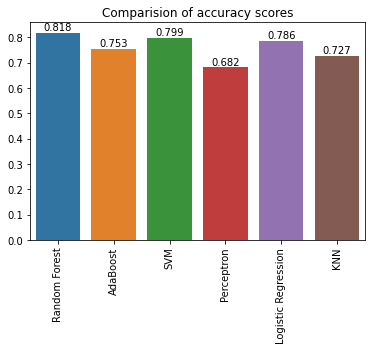

In [42]:
import seaborn as sns
# Graphing library

sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.xticks(rotation=90)
plt.title("Comparision of accuracy scores")
for i, val in enumerate(scores.values()):
    plt.text(i, val+0.01, str(round(val, 3)), ha='center')

In [43]:
import pickle
# perform serialization (exporting)

with open("diabetes_model.pkl", "wb") as f:
    pickle.dump(rf_clf, f)

with open("diabetes_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'min_samples_split': [2, 4, 6],
    'max_features': ['sqrt', 'log2']
}

forest_clf = RandomForestClassifier()
grid = GridSearchCV(forest_clf, param_grid=param_grid, scoring='accuracy', cv=3, verbose=2, n_jobs=-1)

In [45]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy', verbose=2)

In [46]:
grid.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [47]:
best_model = grid.best_estimator_
best_model.score(X_test, y_test)

0.8051948051948052